![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

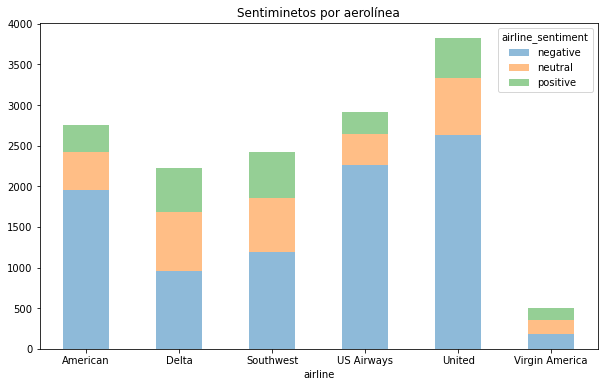

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import std
import nltk
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
vect = CountVectorizer()
X_tweet = vect.fit_transform(X_train)
model = RandomForestClassifier(max_depth=5, random_state=123, class_weight ='balanced')
scores = cross_val_score(model, X_tweet, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy cv: %.3f (%.3f)' % (mean(scores), std(scores)))

model.fit(X_tweet, y_train)
prediccion_randomforest_prob=model.predict(vect.transform(X_test))
Accuracy_CntVtrzr_RFR=metrics.accuracy_score(y_test, prediccion_randomforest_prob)

print('Mean Accuracy en test: ',  Accuracy_CntVtrzr_RFR)

prediction = model.predict(vect.transform(X_test))
confusion_matrix(y_test, prediction)


Mean Accuracy cv: 0.704 (0.007)
Mean Accuracy en test:  0.7270281456953642


array([[2370,  502,  213],
       [ 232,  626,  126],
       [  90,  156,  517]], dtype=int64)

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
vect2 = CountVectorizer(stop_words='english')
X_tweet = vect2.fit_transform(X_train)
model = RandomForestClassifier(max_depth=5, random_state=123, class_weight ='balanced')
scores = cross_val_score(model, X_tweet, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy cv: %.3f (%.3f)' % (mean(scores), std(scores)))

model.fit(X_tweet, y_train)
prediccion_randomforest_prob=model.predict(vect2.transform(X_test))
Accuracy_CntVtrzr_RFR_sw=metrics.accuracy_score(y_test, prediccion_randomforest_prob)

print('Mean Accuracy en test: ',  Accuracy_CntVtrzr_RFR_sw)

prediction = model.predict(vect2.transform(X_test))
confusion_matrix(y_test, prediction)

Mean Accuracy cv: 0.675 (0.015)
Mean Accuracy en test:  0.6740480132450332


array([[2083,  784,  218],
       [ 200,  656,  128],
       [  82,  163,  518]], dtype=int64)

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
words = list(vect.vocabulary_.keys())

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
            
# calcula el acurracy de un modelo Random Forest Classifier 

X_tweet = vect_lemas.fit_transform(X_train)
print(X_tweet.shape)
model = RandomForestClassifier(max_depth=5, random_state=123, class_weight ='balanced')
scores = cross_val_score(model, X_tweet, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy cv: %.3f (%.3f)' % (mean(scores), std(scores)))

model.fit(X_tweet, y_train)
prediccion_randomforest_prob=model.predict(vect_lemas.transform(X_test))
Accuracy_CntVtrzr_lema=metrics.accuracy_score(y_test, prediccion_randomforest_prob)

print('Mean Accuracy en test: ',  Accuracy_CntVtrzr_lema)

prediction = model.predict(vect_lemas.transform(X_test))
confusion_matrix(y_test, prediction)
       
            

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jsantacruz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(9808, 19380)
Mean Accuracy cv: 0.691 (0.007)
Mean Accuracy en test:  0.7179221854304636


array([[2353,  516,  216],
       [ 242,  619,  123],
       [ 125,  141,  497]], dtype=int64)

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
words = list(vect2.vocabulary_.keys())

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas2 = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
            
# calcula el acurracy de un modelo Random Forest Classifier 

X_tweet = vect_lemas2.fit_transform(X_train)
print(X_tweet.shape)
model = RandomForestClassifier(max_depth=5, random_state=123, class_weight ='balanced')
scores = cross_val_score(model, X_tweet, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy cv: %.3f (%.3f)' % (mean(scores), std(scores)))

model.fit(X_tweet, y_train)
prediccion_randomforest_prob=model.predict(vect_lemas2.transform(X_test))
Accuracy_CntVtrzr_lema_sw=metrics.accuracy_score(y_test, prediccion_randomforest_prob)

print('Mean Accuracy en test: ',  Accuracy_CntVtrzr_lema_sw)

prediction = model.predict(vect_lemas2.transform(X_test))
confusion_matrix(y_test, prediction)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jsantacruz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(9808, 19380)
Mean Accuracy cv: 0.691 (0.007)
Mean Accuracy en test:  0.7179221854304636


array([[2353,  516,  216],
       [ 242,  619,  123],
       [ 125,  141,  497]], dtype=int64)

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

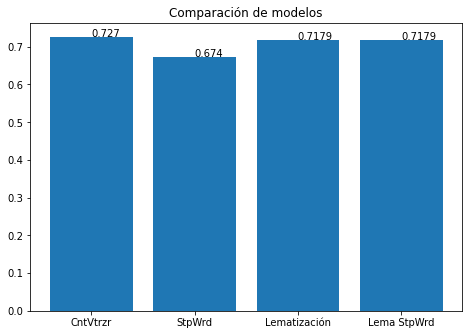

In [15]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['CntVtrzr', 'StpWrd','Lematización', 'Lema StpWrd']
ejeY = [Accuracy_CntVtrzr_RFR,Accuracy_CntVtrzr_RFR_sw,Accuracy_CntVtrzr_lema,Accuracy_CntVtrzr_lema_sw]

ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

### Mejor Modelo: Count Vectorizer

Sorprendentemente, el mejor modelo es aquel que no utiliza ni lematización ni stop words. Puede deberse a la eliminación de negaciones, las cuales claramente van a tener mucha importancia en comentarios negativos o neutrales. A pesar de que la diferencia es poca, el modelo de ML de Random Forest que solamente realizó conteo de palabras fue aquel que tuvo en test un acuraccy más alto en el global de su matriz de confusión. Su principal ventaja respecto al resto es su simplicidad.

### Peor Modelo: Stop Words

La eliminación de las negaciones y otras palabras frecuentes dio como resultado una reducción importante en el acuraccy del modelo. Para este caso de estudio, dichas palabras tienen un alto valor semántico del sentimiento del mensaje, por lo que removerlas reduce la capacidad predictiva del modelo. Es interesante notar como en los siguientes modelos (Lematización y Lematización con Stop Word) se está obteniendo el mismo acuraccy. Esto debido a que, al tratar los verbos únicamente a nivel semántico, es equivalente a remover los stopwords. Adicionalmente, de acuerdo a la documentación no es recomendable usar stop_words='english', ya que como en este caso se pueden filtrar muchas palabras con alto valor predictivo para el contexto. En su lugar, se sugiere definir un conjunto específico de palabras a remover.

Finalmente y a modo informativo, con el fin de aumentar la calidad del modelo, se definió el parámetro class_weight ='balanced' en todos los RandomForestClassifier usados en este notebook, ya que se evidenció en el análisis exploratorio que hay un marcado desbalanceo de clases para los comentarios negativos en el dataset usado.